# <center> THE SPARKS FOUNDATION </center>
## <center> Data Science & Business Analytics Internship (March2021) <center>

## Created by : Tushar Gupta

# Task 2: Prediction using Unsupervised ML
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

## **Step 1: Importing all the necessary libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## **Step 2: Importing the Dataset**

In [32]:
iris = pd.read_csv('./Iris.csv', index_col = 'Id')
iris.index.name = None
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Step 3: **Using the Elbow method to find the optimum number of clusters**

In [33]:
x = iris.iloc[:, :-1].values

within_cluster_ss=[]
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter= 300, n_init =10, random_state = 0)
    kmeans.fit(x)
    within_cluster_ss.append(kmeans.inertia_)

## **Step 4: Plotting the Graph to visualise the Elbow Method** 

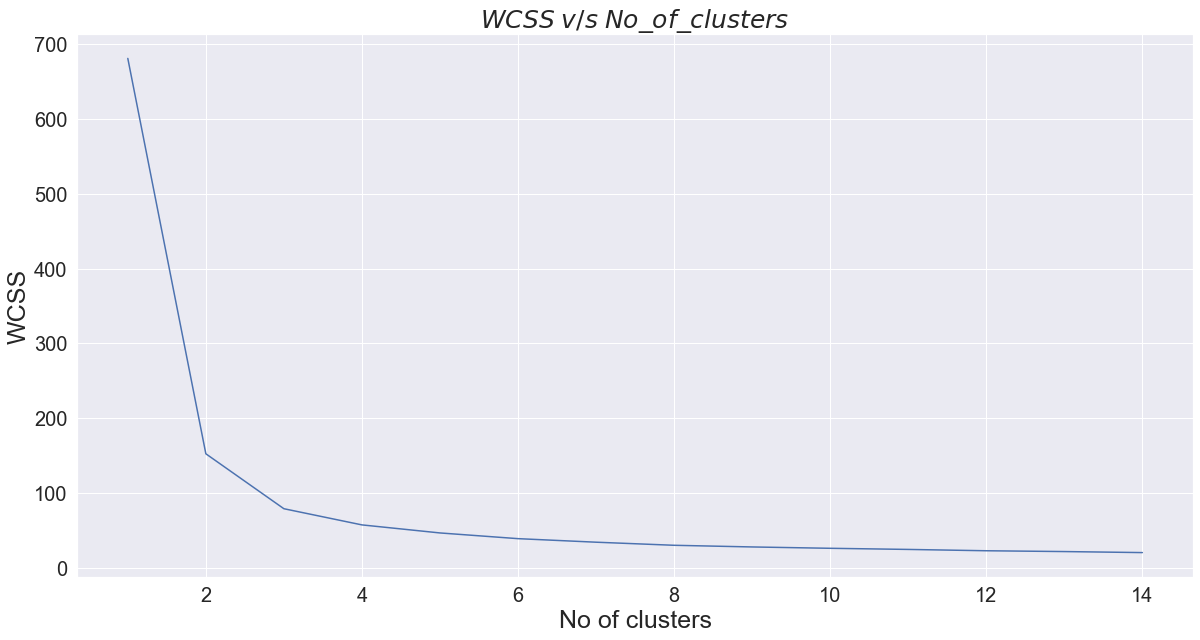

In [34]:
# plotting the result into graph so can we see the elbow and decide the optimum number of cluster
plt.figure(figsize=(20,10))
sns.set(rc = {'axes.grid':True, 'xtick.labelsize':20,'ytick.labelsize':20 , 'axes.labelsize':25})
sns.lineplot(range(1, 15), within_cluster_ss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.title('$WCSS$ $v/s$ $No$_$of$_$clusters$',fontsize = 25)
plt.show()

From the above graph it is clearly visible that optimun number of clusters must be 3

## **Step 6: Training the KMeans classifier**

In [36]:
# Creating the Kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## **Step 7: Visualizing the KMeans classifier**

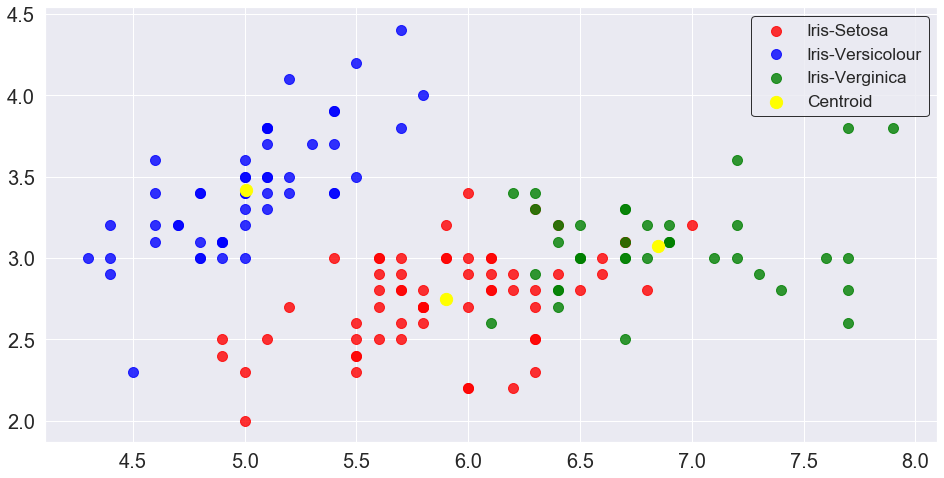

In [59]:
#visualising the cluster formed using Kmeans , with the help of first two attributes
fig1, axes = plt.subplots(figsize = (16,8))
plt.scatter(x[y_kmeans ==0, 0], x[y_kmeans ==0, 1], label = 'Iris-Setosa', s = 100, c = 'red', alpha  = 0.8)
plt.scatter(x[y_kmeans ==1, 0], x[y_kmeans ==1, 1], label = 'Iris-Versicolour',s = 100,c ='blue',  alpha  = 0.8)
plt.scatter(x[y_kmeans ==2, 0], x[y_kmeans ==2, 1], label = 'Iris-Verginica',s = 100, c = 'green',  alpha  = 0.8)


#plotting the cluster centers
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='yellow', s = 150, label = 'Centroid')
plt.legend(edgecolor = 'black',fontsize = 'x-large', loc = 'upper right')
plt.show()